# Business Objective

<div style="text-align: justify;">

Banks are obligated to manage their risk when it comes to giving loans reactively and proactively. In order to achieve this, various methods of calculating defaults have been developed over the years. This notebook demonstrates how a bank could potentially segment its clients with the aim of creating Machine Learning Credit Scoring models as needed. The idea is a model trained on specific population performs better than a single one trained on the entire population.

</div>

<div style="text-align: justify;">

Based on the previous statement, four questions are formulated:

* How are we going to split our population?
* How many clusters are we supposed to aim in order to make the evaluation sustainable?
* What metric are we using to analyze the segmented model's performance compared to the single one?
* What added value does having more than a model provide to the business?

</div>


# Notebook Initialization

Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# pandas configuration
pd.set_option('display.max_columns', None)

Reading dataframe and getting initial information

In [2]:
# getting data from csv file
data = pd.read_csv('datasets/Base_SolicitudesCreditoEfectivo_201307_201505.csv', sep = ";")

# showing top 5
data.head()

,CODMES,CODSOLICITUD,DEUDA,PLAZO_CREDITO,FLG_GARANTIA,MIN_MES_DE_DEFAULT,FLG_DEFAULT_12M,SEGMENTOCLIENTE,TARJETA_RELACIONADA,VEHICULAR_RELACIONADA,HIPOTECARIO_RELACIONADA,ATRASO_MAXIMO_ULT_6M,ATRASO_MAXIMO_ULT_12M,ATRASO_MAXIMO_ULT_24M,MESES_AHORROS_ULT_6M,MEDIANA_AHORROS_ULT_6M,DEUDA_TOTAL_SISTEMA,CLASIF_SISTEMA_ULT_12M,FLG_PDH,NUMERO_DE_PAGOS_PDH,MONTO_TC_SISTEMA,INGRESO_CLIENTE,PROFESION,ZONA_DEL_DESEMBOLSO,ESTADO_CIVIL,EDAD_T,CUOTA,LINEA_DE_TC,MONTO_TC_MEMBRESIA,FLG_TC_VISA,FLG_TC_MC
0,201402,1,7116.681318,48,0,NaN,0,CLIENTES ORO,1,0,0,0,0.0,0.0,6.0,3772.486272,5450.35,0.0,1,24,4067.03,2526.246600,INGENIERO,UCAYALI,SOL,26.0,236.983971,5600.0,170.0,0.0,0.0
1,201404,2,1616.555000,60,0,NaN,0,CLIENTES ORO,1,0,0,0,0.0,0.0,6.0,8389.745000,0.00,0.0,1,24,0.00,2895.761372,TECNICO,AREQUIPA,CAS,49.0,62.089650,19250.0,170.0,0.0,0.0
2,201403,3,8082.775000,48,0,NaN,0,CLIENTES ORO,1,0,0,0,0.0,0.0,6.0,1842.695000,0.00,0.0,1,13,0.00,1474.419056,INGENIERO DE MINAS,PUNO,SOL,33.0,22.894893,10900.0,80.0,0.0,0.0
3,201307,4,10186.990760,48,0,201403.0,1,CLIENTES ORO,0,0,0,0,0.0,0.0,6.0,4514.070000,5661.25,0.0,1,24,0.00,1992.756892,TECNICO,CUZCO,SOL,25.0,244.267800,10900.0,80.0,0.0,0.0
4,201401,5,10777.033330,48,0,NaN,0,CLIENTES PLATINUM SEGM 2,1,0,0,0,0.0,0.0,6.0,7848.908333,0.00,0.0,1,6,0.00,1680.938223,TEC MECANICO AUTOMOTRIZ,LIMA_ESTE,CAS,57.0,17.430000,16300.0,170.0,0.0,0.0


# <span style="color:#FF6600; font-weight:bold;">First Question:</span> <span style="color:#6699CC;">How are we going to split our population?</span>


To start with, the business needs to have the capability of quantify its cutoffs so that it can manage its features properly. To sum up, it is important to determine how many variables are numeric and which of these are useful for generating intervals. This leads to the following question: 

<span style="color:#B0E57C; font-weight:bold;">01. What numeric features are relevant for splitting our universe?</span>

In order to answer the question, let's get the numeric features as first step.

In [3]:
# showing only numeric features based on their dtypes
num_data = data.select_dtypes(include = np.number)

# displaying numeric features
display(num_data.head())

,CODMES,CODSOLICITUD,DEUDA,PLAZO_CREDITO,FLG_GARANTIA,MIN_MES_DE_DEFAULT,FLG_DEFAULT_12M,TARJETA_RELACIONADA,VEHICULAR_RELACIONADA,HIPOTECARIO_RELACIONADA,ATRASO_MAXIMO_ULT_6M,ATRASO_MAXIMO_ULT_12M,ATRASO_MAXIMO_ULT_24M,MESES_AHORROS_ULT_6M,MEDIANA_AHORROS_ULT_6M,DEUDA_TOTAL_SISTEMA,CLASIF_SISTEMA_ULT_12M,FLG_PDH,NUMERO_DE_PAGOS_PDH,MONTO_TC_SISTEMA,INGRESO_CLIENTE,EDAD_T,CUOTA,LINEA_DE_TC,MONTO_TC_MEMBRESIA,FLG_TC_VISA,FLG_TC_MC
0,201402,1,7116.681318,48,0,NaN,0,1,0,0,0,0.0,0.0,6.0,3772.486272,5450.35,0.0,1,24,4067.03,2526.246600,26.0,236.983971,5600.0,170.0,0.0,0.0
1,201404,2,1616.555000,60,0,NaN,0,1,0,0,0,0.0,0.0,6.0,8389.745000,0.00,0.0,1,24,0.00,2895.761372,49.0,62.089650,19250.0,170.0,0.0,0.0
2,201403,3,8082.775000,48,0,NaN,0,1,0,0,0,0.0,0.0,6.0,1842.695000,0.00,0.0,1,13,0.00,1474.419056,33.0,22.894893,10900.0,80.0,0.0,0.0
3,201307,4,10186.990760,48,0,201403.0,1,0,0,0,0,0.0,0.0,6.0,4514.070000,5661.25,0.0,1,24,0.00,1992.756892,25.0,244.267800,10900.0,80.0,0.0,0.0
4,201401,5,10777.033330,48,0,NaN,0,1,0,0,0,0.0,0.0,6.0,7848.908333,0.00,0.0,1,6,0.00,1680.938223,57.0,17.430000,16300.0,170.0,0.0,0.0


As we need features that represent the client's level of indebtedness, their liabilities, and their income, we select "DEUDA", "MEDIANA_AHORROS_ULT_6M" and "INGRESO_CLIENTE". We need to check their distribution to choose proper intervals.

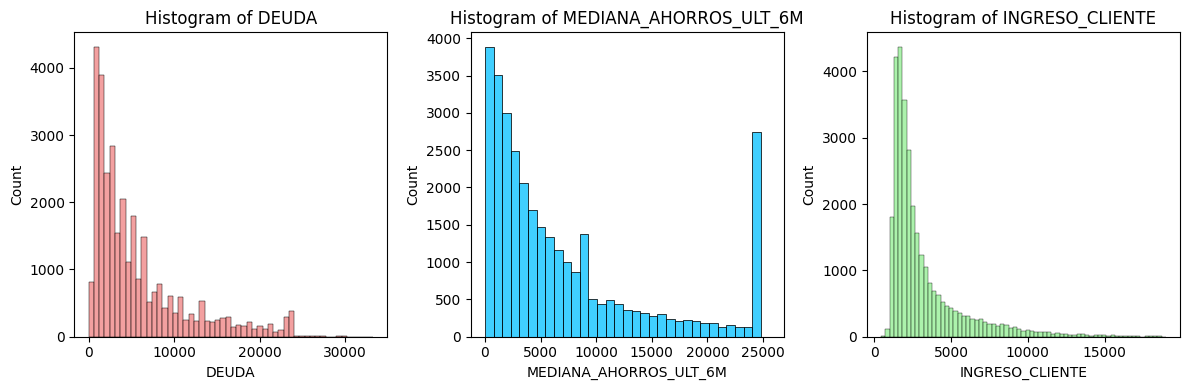

In [4]:
# declaring features to evaluate
selected_numeric_features = ['DEUDA', 'MEDIANA_AHORROS_ULT_6M', 'INGRESO_CLIENTE']

# creating colors
colors = ['lightcoral', 'deepskyblue', 'lightgreen']
# declaring fig and axis
fig, axis = plt.subplots(1, 3, figsize = (12, 4))

# iterating along selected features
for n_iter, (feature, color) in enumerate(zip(selected_numeric_features, colors)):
    # chossing axis
    ax = axis[n_iter]

    # removing outliers just for visualization purposes
    temp = data.loc[(data[feature] < data[feature].quantile(0.999))]

    # getting bins
    bins = np.histogram_bin_edges(a = temp.loc[~temp[feature].isnull(), feature].to_numpy(), bins = 'scott')
    # plotting histogram
    sns.histplot(data = temp,
                 x = feature,
                 bins = bins,
                 color = color,
                 ax = ax)
    # creating titles
    ax.set_title(f'Histogram of {feature}')

plt.tight_layout()
plt.show()

To arrive at a decision we should verify how much they represent in terms of their amount and N. This approach is performed by calculatinf their deciles.

In [150]:
# creating percentiles
for feature in selected_numeric_features:
    # creating array 
    percentiles = num_data[feature].quantile([round(num, 1) for num in np.linspace(0.1, 0.9, 9)])\
                                   .to_dict()
        
    # rounding percentiles
    percentiles = {key: round(value / 50) * 50 for key, value in percentiles.items()}

    # creating choise list
    values = list(percentiles.values())

    # creating conditions
    conditions = [num_data[feature] <= value for value in values]
    
    # adding upper bound condition
    conditions += [num_data[feature] > values[-1]]

    choice_list = [f'[0 - {values[0]:,.0f}]']
    choice_list += [f'<{values[i]:,.0f} - {values[i + 1]:,.0f}]' for i in range(len(values) - 1)]
    choice_list += [f'<{values[-1]:,.0f} - +inf>']

    # creating new dict to map
    choice_list_dict = dict(zip(choice_list, list(percentiles.keys()) + [list(percentiles.keys())[-1] + 0.01]))

    # creating columns
    num_data[f'{feature}_percen_label'] = np.select(condlist = conditions,
                                                    choicelist = choice_list,
                                                    default = choice_list[0])
    
    num_data[f'{feature}_percen_value'] = num_data[f'{feature}_percen_label'].map(choice_list_dict)

#

In [149]:
[cond(num_data) for cond in conditions]

[0         True
 1         True
 2         True
 3         True
 4         True
          ...  
 31939     True
 31940     True
 31941     True
 31942    False
 31943     True
 Name: INGRESO_CLIENTE, Length: 31944, dtype: bool,
 0         True
 1         True
 2         True
 3         True
 4         True
          ...  
 31939     True
 31940     True
 31941     True
 31942    False
 31943     True
 Name: INGRESO_CLIENTE, Length: 31944, dtype: bool,
 0         True
 1         True
 2         True
 3         True
 4         True
          ...  
 31939     True
 31940     True
 31941     True
 31942    False
 31943     True
 Name: INGRESO_CLIENTE, Length: 31944, dtype: bool,
 0         True
 1         True
 2         True
 3         True
 4         True
          ...  
 31939     True
 31940     True
 31941     True
 31942    False
 31943     True
 Name: INGRESO_CLIENTE, Length: 31944, dtype: bool,
 0         True
 1         True
 2         True
 3         True
 4         True
        

In [148]:
choice_list

['[0 - 1,400]',
 '<1,400 - 1,600]',
 '<1,600 - 1,750]',
 '<1,750 - 2,000]',
 '<2,000 - 2,250]',
 '<2,250 - 2,650]',
 '<2,650 - 3,250]',
 '<3,250 - 4,350]',
 '<4,350 - 6,650]',
 '<6,650 - +inf>']

In [151]:
num_data.INGRESO_CLIENTE_percen_label.value_counts()

INGRESO_CLIENTE_percen_label
[0 - 1,400]        4178
<1,750 - 2,000]    3553
<2,250 - 2,650]    3250
<1,400 - 1,600]    3245
<6,650 - +inf>     3134
<4,350 - 6,650]    3132
<3,250 - 4,350]    3124
<2,650 - 3,250]    3059
<2,000 - 2,250]    2843
<1,600 - 1,750]    2426
Name: count, dtype: int64

[<function __main__.<listcomp>.<lambda>(df)>,
 <function __main__.<listcomp>.<lambda>(df)>,
 <function __main__.<listcomp>.<lambda>(df)>,
 <function __main__.<listcomp>.<lambda>(df)>,
 <function __main__.<listcomp>.<lambda>(df)>,
 <function __main__.<listcomp>.<lambda>(df)>,
 <function __main__.<listcomp>.<lambda>(df)>,
 <function __main__.<listcomp>.<lambda>(df)>,
 <function __main__.<listcomp>.<lambda>(df)>,
 <function __main__.<lambda>(df)>]

In [117]:
num_data.MEDIANA_AHORROS_ULT_6M_percen_value.value_counts()

MEDIANA_AHORROS_ULT_6M_percen_value
0.10    28752
0.91     3192
Name: count, dtype: int64

In [152]:
num_data.groupby('DEUDA_percen_label')\
        .agg({'DEUDA': ['min', 'max']})

DEUDA               
                             min            max
DEUDA_percen_label                             
<1,350 - 1,950]      1350.028208    1949.453080
<1,950 - 2,700]      1951.181885    2699.932441
<14,350 - +inf>     14359.605330  205483.523000
<2,700 - 3,750]      2700.980508    3749.925328
<3,750 - 5,050]      3750.004305    5048.699547
<5,050 - 6,650]      5050.136422    6649.187083
<6,650 - 9,300]      6651.212583    9299.621958
<800 - 1,350]         800.400791    1349.969560
<9,300 - 14,350]     9303.700167   14346.450080
[0 - 800]               8.791365     799.894286

In [94]:
len(choice_list)

10

In [91]:
conditions[0](num_data)

,CODMES,CODSOLICITUD,DEUDA,PLAZO_CREDITO,FLG_GARANTIA,MIN_MES_DE_DEFAULT,FLG_DEFAULT_12M,TARJETA_RELACIONADA,VEHICULAR_RELACIONADA,HIPOTECARIO_RELACIONADA,ATRASO_MAXIMO_ULT_6M,ATRASO_MAXIMO_ULT_12M,ATRASO_MAXIMO_ULT_24M,MESES_AHORROS_ULT_6M,MEDIANA_AHORROS_ULT_6M,DEUDA_TOTAL_SISTEMA,CLASIF_SISTEMA_ULT_12M,FLG_PDH,NUMERO_DE_PAGOS_PDH,MONTO_TC_SISTEMA,INGRESO_CLIENTE,EDAD_T,CUOTA,LINEA_DE_TC,MONTO_TC_MEMBRESIA,FLG_TC_VISA,FLG_TC_MC
0,201402,1,7116.681318,48,0,NaN,0,1,0,0,0,0.0,0.0,6.0,3772.486272,5450.35,0.0,1,24,4067.03,2526.246600,26.0,236.983971,5600.0,170.0,0.0,0.0
1,201404,2,1616.555000,60,0,NaN,0,1,0,0,0,0.0,0.0,6.0,8389.745000,0.00,0.0,1,24,0.00,2895.761372,49.0,62.089650,19250.0,170.0,0.0,0.0
2,201403,3,8082.775000,48,0,NaN,0,1,0,0,0,0.0,0.0,6.0,1842.695000,0.00,0.0,1,13,0.00,1474.419056,33.0,22.894893,10900.0,80.0,0.0,0.0
3,201307,4,10186.990760,48,0,201403.0,1,0,0,0,0,0.0,0.0,6.0,4514.070000,5661.25,0.0,1,24,0.00,1992.756892,25.0,244.267800,10900.0,80.0,0.0,0.0
4,201401,5,10777.033330,48,0,NaN,0,1,0,0,0,0.0,0.0,6.0,7848.908333,0.00,0.0,1,6,0.00,1680.938223,57.0,17.430000,16300.0,170.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31939,201505,31940,11252.741500,48,1,NaN,0,1,0,0,0,0.0,0.0,6.0,6169.160828,0.00,0.0,0,1,0.00,6382.493352,38.0,182.877618,30000.0,400.0,0.0,0.0
31940,201505,31941,1311.508333,24,0,201508.0,1,0,0,0,0,15.0,15.0,1.0,5016.980000,1710.35,1.0,0,0,1262.04,1032.662287,32.0,72.533916,13080.0,166.0,1.0,1.0
31941,201505,31942,6714.922667,48,0,NaN,0,1,0,0,0,0.0,0.0,5.0,16020.760200,1956.13,0.0,1,24,1304.17,3278.492914,48.0,107.533293,10240.0,60.0,0.0,0.0
31942,201505,31943,13673.785880,60,0,NaN,0,1,0,0,0,0.0,0.0,6.0,21698.961120,69155.35,1.0,1,24,28173.70,7159.656096,46.0,3006.874374,13000.0,80.0,0.0,0.0
